# Sample Average Method with E-Greedy Selection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bandit import Bandit,simulate
from action import NonStationaryAction,StationaryAction


<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_46834/1051650074.py:11: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(rewards, label='$\epsilon = %.02f$' % (eps))
/tmp/ipykernel_46834/1051650074.py:18: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(counts, label='$\epsilon = %.02f$' % (eps))
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:36<00:00, 20.65it/s]


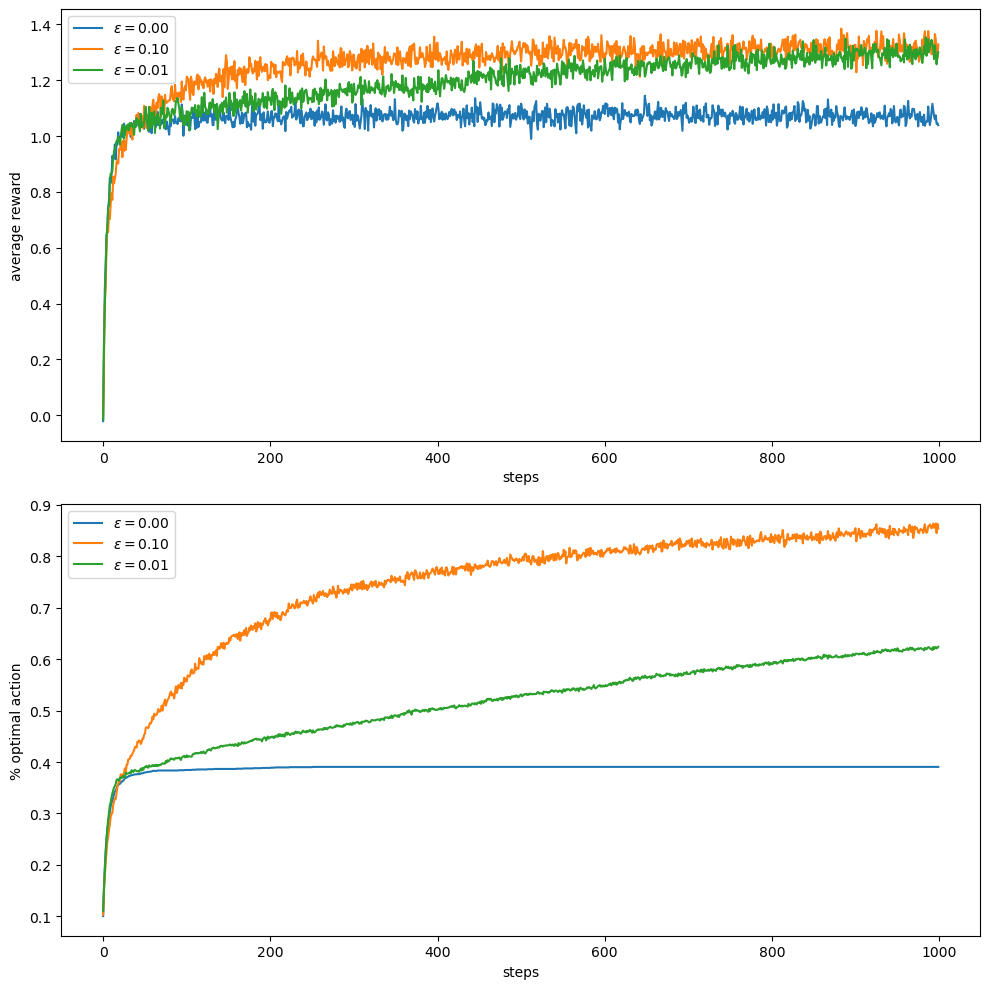

In [2]:
epsilons = [0, 0.1, 0.01]
runs = 2000
time = 1000
actions = [StationaryAction(np.random.randn(), 1.0) for _ in range(10)]
bandits = [Bandit(epsilon=eps, actions=actions) for eps in epsilons]
best_action_counts, rewards = simulate(runs, time, bandits)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
for eps, rewards in zip(epsilons, rewards):
    plt.plot(rewards, label='$\epsilon = %.02f$' % (eps))
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for eps, counts in zip(epsilons, best_action_counts):
    plt.plot(counts, label='$\epsilon = %.02f$' % (eps))
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.tight_layout()

plt.show()

# Non-Stationary Reward Distribution with Constant Step Size

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [22:52<00:00,  1.46it/s]


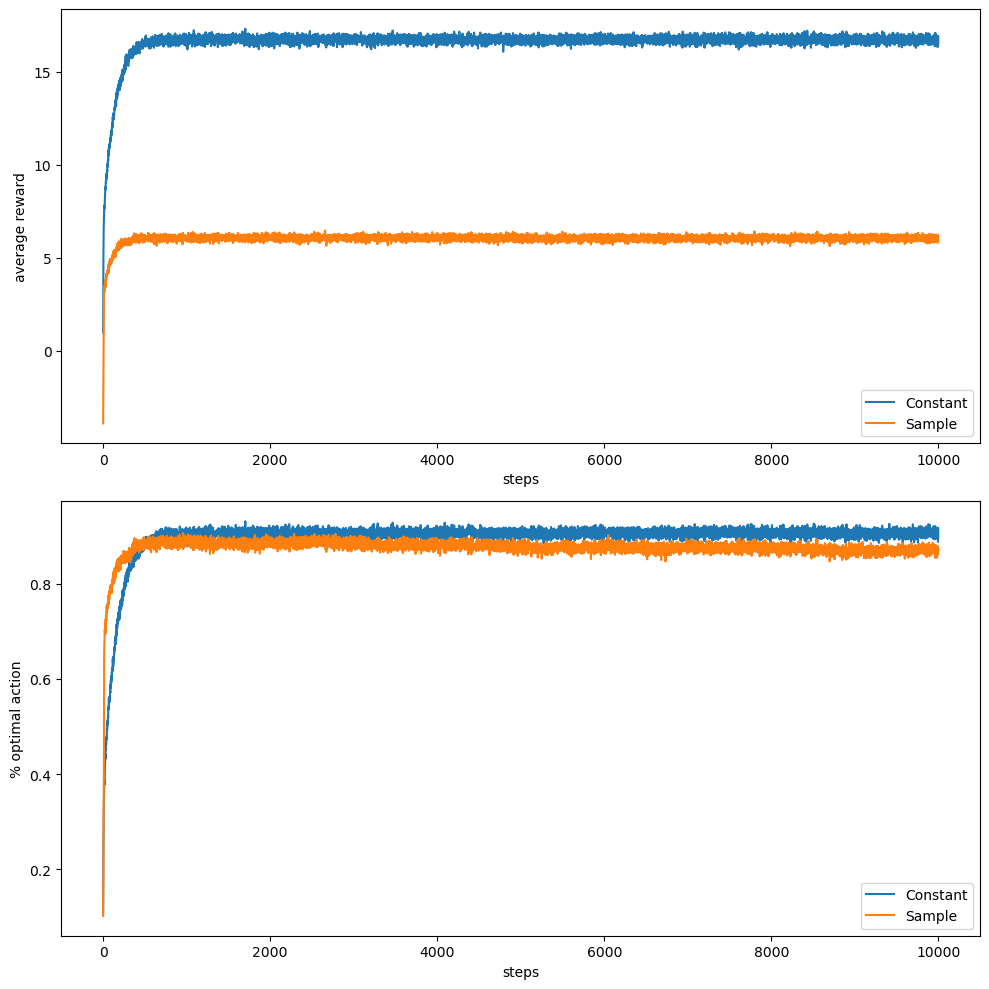

In [3]:
eps = 0.1
labels = ['Constant','Sample']
runs = 2000
time = 10000
actions = [NonStationaryAction(np.random.randn(), 1.0) for _ in range(10)]
bandits = [Bandit(epsilon=eps, actions=actions,step_size=0.1),Bandit(epsilon=eps, actions=actions)]
best_action_counts, rewards = simulate(runs, time, bandits)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
for label, rewards in zip(labels, rewards):
    plt.plot(rewards, label=label)
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for label, rewards in zip(labels, best_action_counts):
    plt.plot(rewards, label=label)
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.tight_layout()

plt.show()


# Optimistic Initialization

In [ ]:
runs = 2000
time = 1000
labels = ['Q1=0,e=0.1','Q1=5,e=0']
actions = [StationaryAction(np.random.randn(), 1.0) for _ in range(10)]
bandits = [Bandit(epsilon=0.1, actions=actions),Bandit(epsilon=0, actions=actions,initial_value=5)]
best_action_counts, rewards = simulate(runs, time, bandits)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
for label, rewards in zip(labels, rewards):
    plt.plot(rewards, label=label)
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for label, counts in zip(labels, best_action_counts):
    plt.plot(counts, label=label)
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.tight_layout()

plt.show()